Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :
1. Imputasi missing value dengan mean, median, dan modus
2. Cek korelasi antar variabel dengan heatmap
3. Lakukan imbalance handling dengan undersampling
4. Lakukan scaling dengan robust scaler dan minmax

In [ ]:
pip install SMOTE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasi kata

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [ ]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_counts[col] = count_outliers_iqr(df[col])

outlier_counts_df = pd.DataFrame(list(outlier_counts.items()),
                                 columns=['Column', 'Outlier Count'])

outlier_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,0
7,Age,16
8,Outcome,0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


1. Imputasi missing value dengan mean, median, modus

In [ ]:
data = pd.read_csv('diabetes.csv')

data_mean = data.fillna(data.mean())

data_median = data.fillna(data.median())

data_modus = data.fillna(data.mode().iloc[0])\

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Cek korelasi antar variabel dengan heatmap

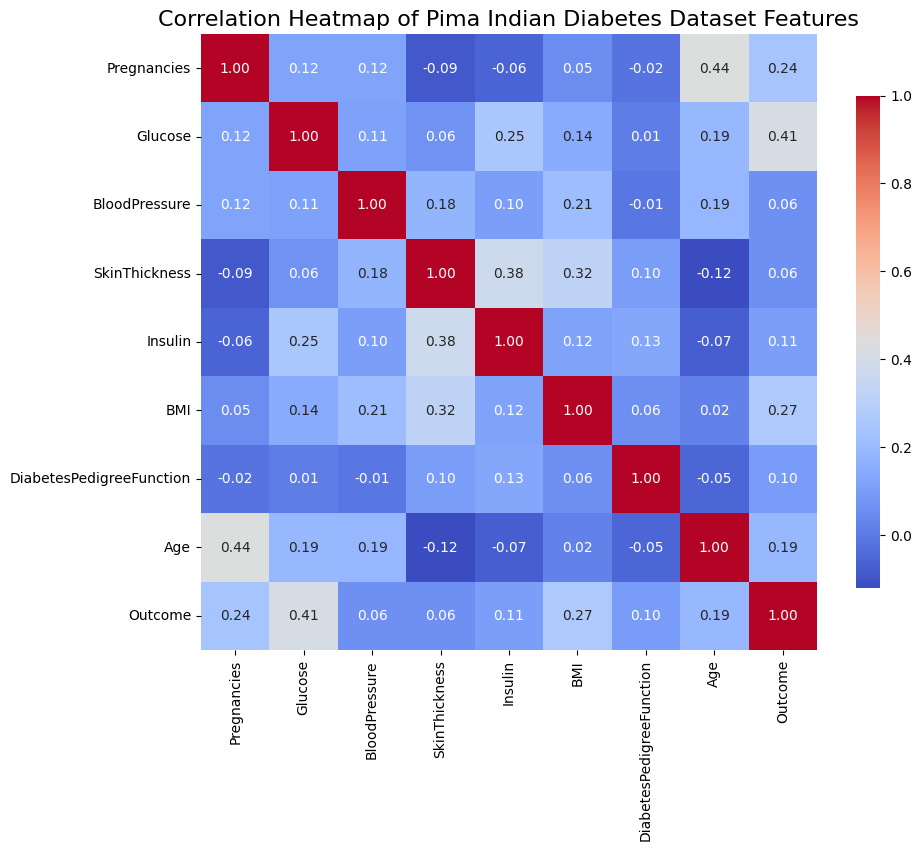

In [ ]:
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap of Pima Indian Diabetes Dataset Features', fontsize=16)
    plt.show()

plot_correlation_heatmap(df)

3. Lakukan imbalance handling dengan undersampling


In [ ]:
from sklearn.utils import resample
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_classes=2,
                           weights=[0.8, 0.2],
                           n_features=4,
                           n_samples=100,
                           random_state=42)

df = pd.DataFrame(X, columns=['feature_1',
                              'feature_2',
                              'feature_3',
                              'feature_4'])
df['balance'] = y
print(df)

df_major = df[df.balance == 0]
df_minor = df[df.balance == 1]

df_minor_sample = resample(df_minor,

                           replace=True,

                           n_samples=80,
                           random_state=42)

df_sample = pd.concat([df_major, df_minor_sample])

print(df_sample.balance.value_counts())


    feature_1  feature_2  feature_3  feature_4  balance
0   -1.053839  -1.027544  -0.329294   0.826007        1
1    1.569317   1.306542  -0.239385  -0.331376        0
2   -0.658926  -0.357633   0.723682  -0.628277        0
3   -0.136856   0.460938   1.896911  -2.281386        0
4   -0.048629   0.502301   1.778730  -2.171053        0
..        ...        ...        ...        ...      ...
95  -2.241820  -1.248690   2.357902  -2.009185        0
96   0.573042   0.362054  -0.462814   0.341294        1
97  -0.375121  -0.149518   0.588465  -0.575002        0
98   1.042518   1.058239   0.461945  -0.984846        0
99  -0.121203  -0.043997   0.204211  -0.203119        0

[100 rows x 5 columns]
balance
0    80
1    80
Name: count, dtype: int64


4. Lakukan scaling dengan robust scaler dan minmax


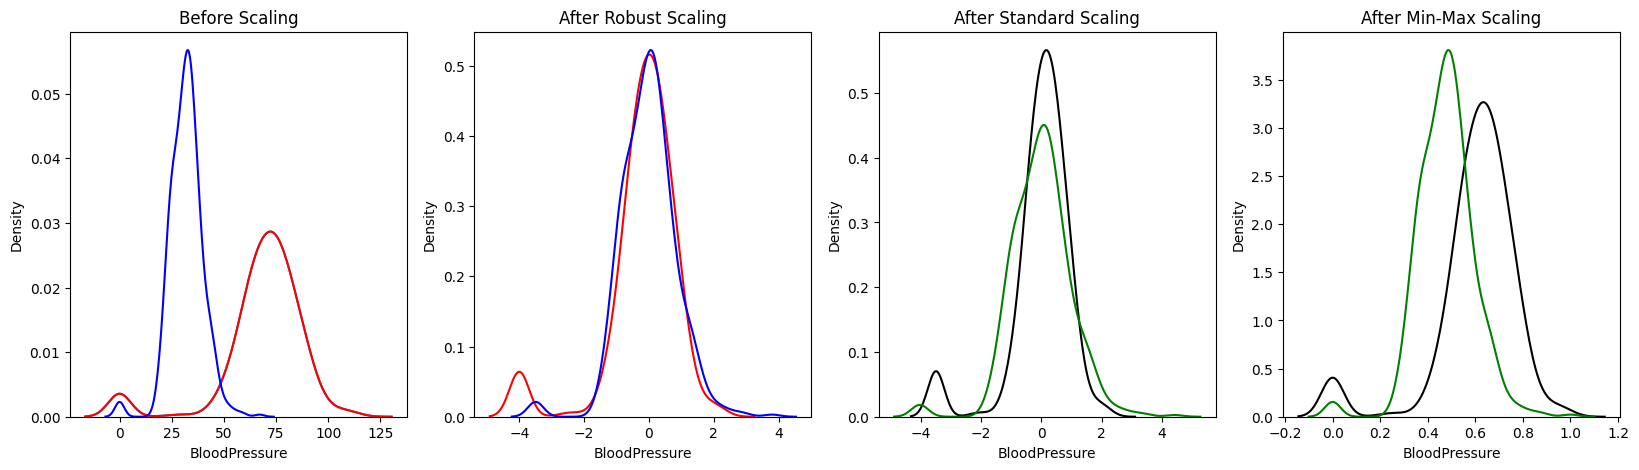

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_data = pd.read_csv('diabetes.csv')

def scale_data(data, scaler):
    scaled_data = scaler.fit_transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns)

robust_scaler = preprocessing.RobustScaler()
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()


robust_df = scale_data(diabetes_data, robust_scaler)
minmax_df = scale_data(diabetes_data, minmax_scaler)
standard_df = scale_data(diabetes_data, standard_scaler)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(diabetes_data['BloodPressure'], ax=ax1, label='BloodPressure')

sns.kdeplot(diabetes_data['BloodPressure'], ax = ax1, color ='r')
sns.kdeplot(diabetes_data['BMI'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['BloodPressure'], ax = ax2, color ='red')
sns.kdeplot(robust_df['BMI'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['BloodPressure'], ax = ax3, color ='black')
sns.kdeplot(standard_df['BMI'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['BloodPressure'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['BMI'], ax = ax4, color ='g')
plt.show()